In [ ]:
import numpy as np
import pandas as pd
import os, h5py
import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# SHAP
import shap
shap.initjs()

In [ ]:
COVID = pd.read_csv("D:/ANN_cement.csv")
COVID_labels = COVID.pop('Endpoint')

print("COVID data shape is {}".format(COVID.shape))
print("COVID labels shape is {}".format(COVID_labels.shape))

input_shape = np.shape(COVID)[1]

COVID data shape is (609, 67)
COVID labels shape is (609,)


In [ ]:
#Define model structure
def ANN_model():
    model = tf.keras.Sequential([
        layers.Dense(67,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu', input_shape=[input_shape]),
        layers.BatchNormalization(),
        layers.Dense(54,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(41,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(15,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(5,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='sigmoid')
    ])
    #Compile the model
    optimizer = tf.keras.optimizers.Adam(lr= 0.001)   
    model.compile(loss= 'binary_crossentropy', optimizer=optimizer, metrics=['acc'])
    
    return model

In [ ]:
model = ANN_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 67)                4556      
_________________________________________________________________
batch_normalization (BatchNo (None, 67)                268       
_________________________________________________________________
dense_1 (Dense)              (None, 54)                3672      
_________________________________________________________________
batch_normalization_1 (Batch (None, 54)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 41)                2255      
_________________________________________________________________
batch_normalization_2 (Batch (None, 41)                164       
_________________________________________________________________
dense_3 (Dense)              (None, 28)                1

In [ ]:
#creat the directory to save the the model
directory = "D:/Results/ANN_SHAP/"
os.makedirs(directory,exist_ok=True)
os.makedirs(os.path.join(directory,"dataset"),exist_ok=True)
os.makedirs(os.path.join(directory,"model","ANN"),exist_ok=True)

#split the training and testing datasets
train_data, test_data, train_labels, test_labels = train_test_split(COVID, COVID_labels, test_size=0.2, random_state=0)

#save the datasets
os.chdir(os.path.join(directory,"dataset"))
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
train_labels.to_csv("train_labels.csv", index=False)
test_labels_ANN = pd.DataFrame(test_labels, columns=["Endpoint"])
test_labels_ANN.to_csv("test_labels.csv", index=False)
#Remove target column in dataset
# del train_data["SUBJID"]
# del test_data["SUBJID"]

#Scaling
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#Train the model
model = ANN_model()
history = model.fit(train_data, train_labels,batch_size=32, epochs=500, verbose = 1, validation_data=(test_data, test_labels))

#save the model
os.chdir(os.path.join(directory,"model","ANN"))
model.save('model_ANN_results.h5')

Epoch 1/500
16/16 [==============================] - 3s 115ms/step - loss: 1.0442 - acc: 0.4772 - val_loss: 0.8972 - val_acc: 0.7459
Epoch 2/500
16/16 [==============================] - 0s 19ms/step - loss: 0.8368 - acc: 0.6568 - val_loss: 0.8845 - val_acc: 0.7049
Epoch 3/500
16/16 [==============================] - 0s 18ms/step - loss: 0.8143 - acc: 0.7013 - val_loss: 0.8715 - val_acc: 0.7049
Epoch 4/500
16/16 [==============================] - 0s 18ms/step - loss: 0.7242 - acc: 0.7648 - val_loss: 0.8467 - val_acc: 0.7869
Epoch 5/500
16/16 [==============================] - 0s 18ms/step - loss: 0.6832 - acc: 0.7978 - val_loss: 0.8082 - val_acc: 0.7951
Epoch 6/500
16/16 [==============================] - 0s 17ms/step - loss: 0.6393 - acc: 0.8582 - val_loss: 0.7707 - val_acc: 0.8033
Epoch 7/500
16/16 [==============================] - 0s 17ms/step - loss: 0.6020 - acc: 0.8586 - val_loss: 0.7348 - val_acc: 0.8115
Epoch 8/500
16/16 [==============================] - 0s 18ms/step - loss: 0

16/16 [==============================] - 0s 16ms/step - loss: 0.2407 - acc: 0.9940 - val_loss: 0.3280 - val_acc: 0.9508
Epoch 63/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2828 - acc: 0.9703 - val_loss: 0.3802 - val_acc: 0.9180
Epoch 64/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2487 - acc: 0.9889 - val_loss: 0.3632 - val_acc: 0.9262
Epoch 65/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2487 - acc: 0.9912 - val_loss: 0.3790 - val_acc: 0.9508
Epoch 66/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2429 - acc: 0.9915 - val_loss: 0.3582 - val_acc: 0.9344
Epoch 67/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2647 - acc: 0.9818 - val_loss: 0.3728 - val_acc: 0.9508
Epoch 68/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2360 - acc: 0.9924 - val_loss: 0.4065 - val_acc: 0.9344
Epoch 69/500
16/16 [==============================] - 0s 15ms/step - loss: 0.2367 

16/16 [==============================] - 0s 16ms/step - loss: 0.3105 - acc: 0.9673 - val_loss: 0.3648 - val_acc: 0.9426
Epoch 124/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1983 - acc: 0.9978 - val_loss: 0.3854 - val_acc: 0.9262
Epoch 125/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1984 - acc: 0.9984 - val_loss: 0.3770 - val_acc: 0.9426
Epoch 126/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2059 - acc: 0.9952 - val_loss: 0.3799 - val_acc: 0.9180
Epoch 127/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2332 - acc: 0.9733 - val_loss: 0.3783 - val_acc: 0.9262
Epoch 128/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2154 - acc: 0.9887 - val_loss: 0.3807 - val_acc: 0.9262
Epoch 129/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2393 - acc: 0.9752 - val_loss: 0.3921 - val_acc: 0.9262
Epoch 130/500
16/16 [==============================] - 0s 17ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1830 - acc: 0.9982 - val_loss: 0.4068 - val_acc: 0.9098
Epoch 185/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1855 - acc: 0.9945 - val_loss: 0.4143 - val_acc: 0.9180
Epoch 186/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1805 - acc: 0.9957 - val_loss: 0.5039 - val_acc: 0.9016
Epoch 187/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1962 - acc: 0.9921 - val_loss: 0.5404 - val_acc: 0.8770
Epoch 188/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2031 - acc: 0.9849 - val_loss: 0.4585 - val_acc: 0.9016
Epoch 189/500
16/16 [==============================] - 0s 17ms/step - loss: 0.1974 - acc: 0.9842 - val_loss: 0.4031 - val_acc: 0.9098
Epoch 190/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1883 - acc: 0.9935 - val_loss: 0.4087 - val_acc: 0.8934
Epoch 191/500
16/16 [==============================] - 0s 16ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1639 - acc: 1.0000 - val_loss: 0.3068 - val_acc: 0.9426
Epoch 246/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1642 - acc: 1.0000 - val_loss: 0.3064 - val_acc: 0.9426
Epoch 247/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1648 - acc: 0.9965 - val_loss: 0.2986 - val_acc: 0.9426
Epoch 248/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1640 - acc: 0.9992 - val_loss: 0.3065 - val_acc: 0.9344
Epoch 249/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1738 - acc: 0.9939 - val_loss: 0.3420 - val_acc: 0.9262
Epoch 250/500
16/16 [==============================] - 0s 16ms/step - loss: 0.2385 - acc: 0.9718 - val_loss: 0.3966 - val_acc: 0.8934
Epoch 251/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1680 - acc: 0.9989 - val_loss: 0.4163 - val_acc: 0.9016
Epoch 252/500
16/16 [==============================] - 0s 16ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1670 - acc: 0.9948 - val_loss: 0.3589 - val_acc: 0.9180
Epoch 307/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1751 - acc: 0.9919 - val_loss: 0.3723 - val_acc: 0.9262
Epoch 308/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1485 - acc: 0.9990 - val_loss: 0.3915 - val_acc: 0.9344
Epoch 309/500
16/16 [==============================] - 0s 17ms/step - loss: 0.1436 - acc: 0.9990 - val_loss: 0.4466 - val_acc: 0.9098
Epoch 310/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1484 - acc: 0.9985 - val_loss: 0.4015 - val_acc: 0.9262
Epoch 311/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1494 - acc: 0.9975 - val_loss: 0.3739 - val_acc: 0.9344
Epoch 312/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1437 - acc: 0.9994 - val_loss: 0.3819 - val_acc: 0.9426
Epoch 313/500
16/16 [==============================] - 0s 16ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1342 - acc: 0.9982 - val_loss: 0.4164 - val_acc: 0.9016
Epoch 367/500
16/16 [==============================] - 0s 17ms/step - loss: 0.1506 - acc: 0.9911 - val_loss: 0.3927 - val_acc: 0.9098
Epoch 368/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1782 - acc: 0.9849 - val_loss: 0.5354 - val_acc: 0.8770
Epoch 369/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1730 - acc: 0.9862 - val_loss: 0.4276 - val_acc: 0.9016
Epoch 370/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1336 - acc: 0.9990 - val_loss: 0.3526 - val_acc: 0.9262
Epoch 371/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1447 - acc: 0.9948 - val_loss: 0.3209 - val_acc: 0.9262
Epoch 372/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1406 - acc: 0.9960 - val_loss: 0.3694 - val_acc: 0.9098
Epoch 373/500
16/16 [==============================] - 0s 16ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1211 - acc: 1.0000 - val_loss: 0.3101 - val_acc: 0.9508
Epoch 427/500
16/16 [==============================] - 0s 17ms/step - loss: 0.1265 - acc: 0.9969 - val_loss: 0.3739 - val_acc: 0.9426
Epoch 428/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1172 - acc: 1.0000 - val_loss: 0.4020 - val_acc: 0.8934
Epoch 429/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1208 - acc: 0.9968 - val_loss: 0.3754 - val_acc: 0.9262
Epoch 430/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1254 - acc: 0.9968 - val_loss: 0.4894 - val_acc: 0.8770
Epoch 431/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1374 - acc: 0.9902 - val_loss: 0.3719 - val_acc: 0.9016
Epoch 432/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1341 - acc: 0.9883 - val_loss: 0.3098 - val_acc: 0.9098
Epoch 433/500
16/16 [==============================] - 0s 16ms/step - loss: 

16/16 [==============================] - 0s 16ms/step - loss: 0.1122 - acc: 0.9982 - val_loss: 0.3265 - val_acc: 0.9262
Epoch 487/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1093 - acc: 0.9993 - val_loss: 0.3326 - val_acc: 0.9262
Epoch 488/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1254 - acc: 0.9964 - val_loss: 0.3563 - val_acc: 0.9098
Epoch 489/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1353 - acc: 0.9876 - val_loss: 0.3183 - val_acc: 0.9262
Epoch 490/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1170 - acc: 0.9946 - val_loss: 0.3772 - val_acc: 0.9180
Epoch 491/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1333 - acc: 0.9957 - val_loss: 0.4323 - val_acc: 0.9180
Epoch 492/500
16/16 [==============================] - 0s 16ms/step - loss: 0.1194 - acc: 0.9964 - val_loss: 0.4310 - val_acc: 0.9098
Epoch 493/500
16/16 [==============================] - ETA: 0s - loss: 0.107

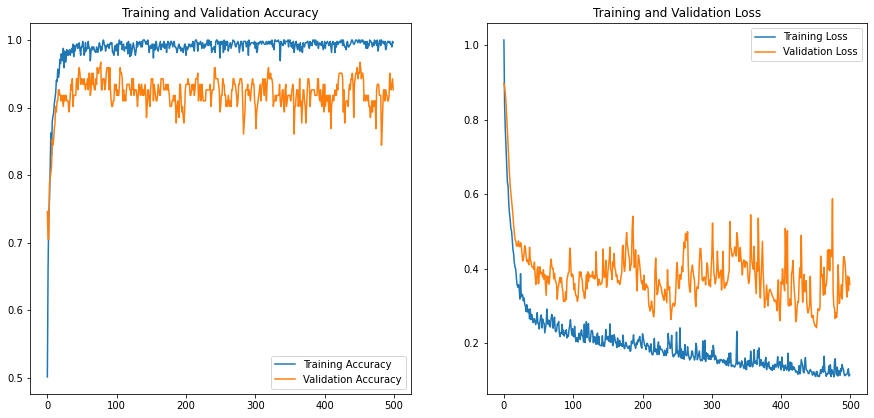

In [ ]:
#Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Evaluate the model
evaluate_model = model.evaluate(test_data, test_labels)
evaluate_model

4/4 [==============================] - 0s 6ms/step - loss: 0.3576 - acc: 0.9262


[0.35755041241645813, 0.9262295365333557]

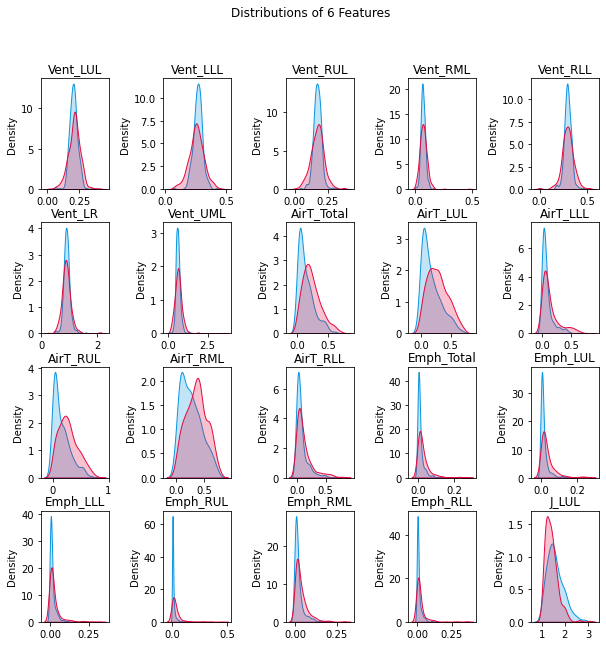

In [ ]:
COVID = pd.read_csv("D:/ANN_cement.csv")
# plot_df = COVID.drop(['SUBJID','Gender','Age','smoking','DM','HTN','CoronaryAds','COPD','CKD','fever','Cough/sputum','Dyspnea','Myalgia','headache'], axis = 1)
# plot_df1 = COVID.drop(['SUBJID'], axis = 1)
feat_names1 = list(COVID.drop(['Endpoint'], axis = 1).columns)

sns.set_palette(sns.color_palette(['#0b96e0','#e00b41']))
labs = ['Cement','Normal']
lab_dict = {1:'Cement', 0:'Normal'}

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 10})

fig, axes = plt.subplots(nrows=4, ncols=5)
fig.subplots_adjust(hspace=0.3,wspace=0.8)
fig.suptitle('Distributions of 6 Features')

for ax,feature,name in zip(axes.flatten(), 
                           feat_names1,
                           feat_names1):
    ax.set(title=name)
    for i in [0,1]:
        sns.kdeplot(data = COVID[COVID['Endpoint'] == i][feature].values,
                    label = lab_dict[i],
                    shade = True,
                    ax = ax)

In [ ]:
explainer = shap.KernelExplainer(model.predict,train_data)
shap_values = explainer.shap_values(test_data,nsamples=100)
expected_value = explainer.expected_value

Using 487 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/122 [00:00<?, ?it/s]

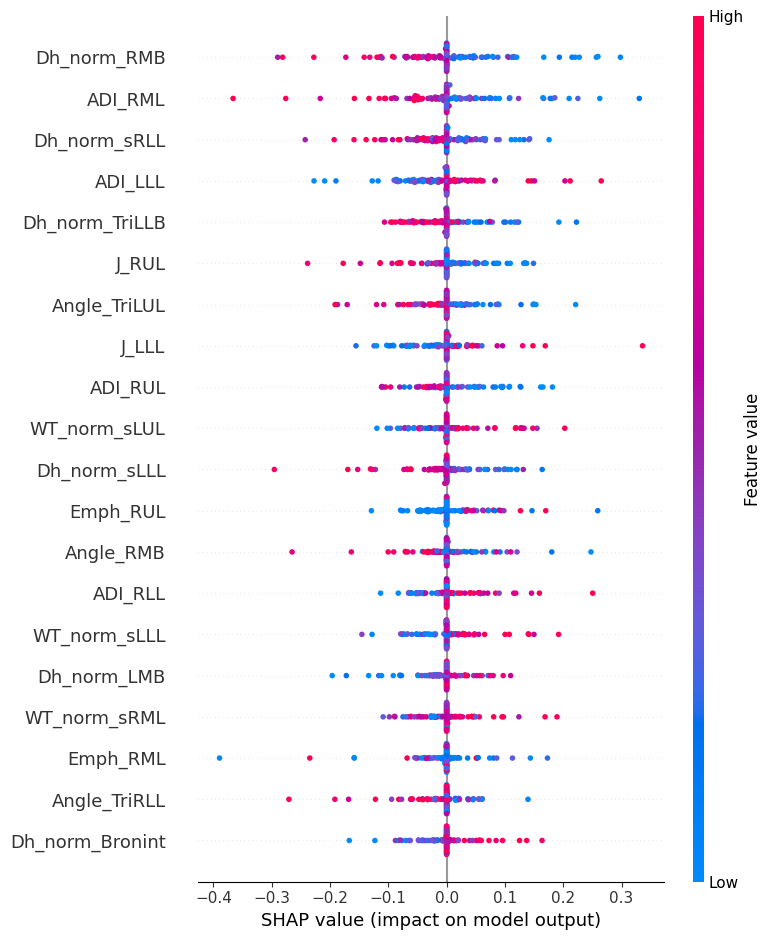

In [ ]:
#x:shap score, y:features in order of importance
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 100
shap.summary_plot(shap_values[0],test_data,feature_names = feat_names1,plot_type='dot')

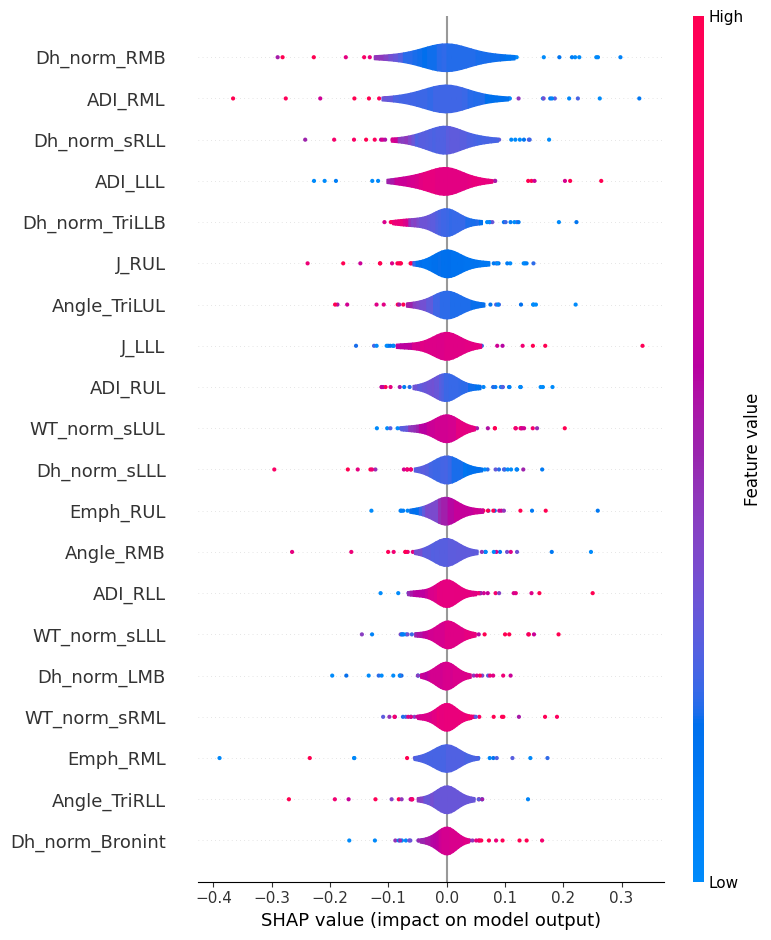

In [ ]:
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 100
shap.summary_plot(shap_values[0],test_data,feature_names = feat_names1, plot_type='violin')

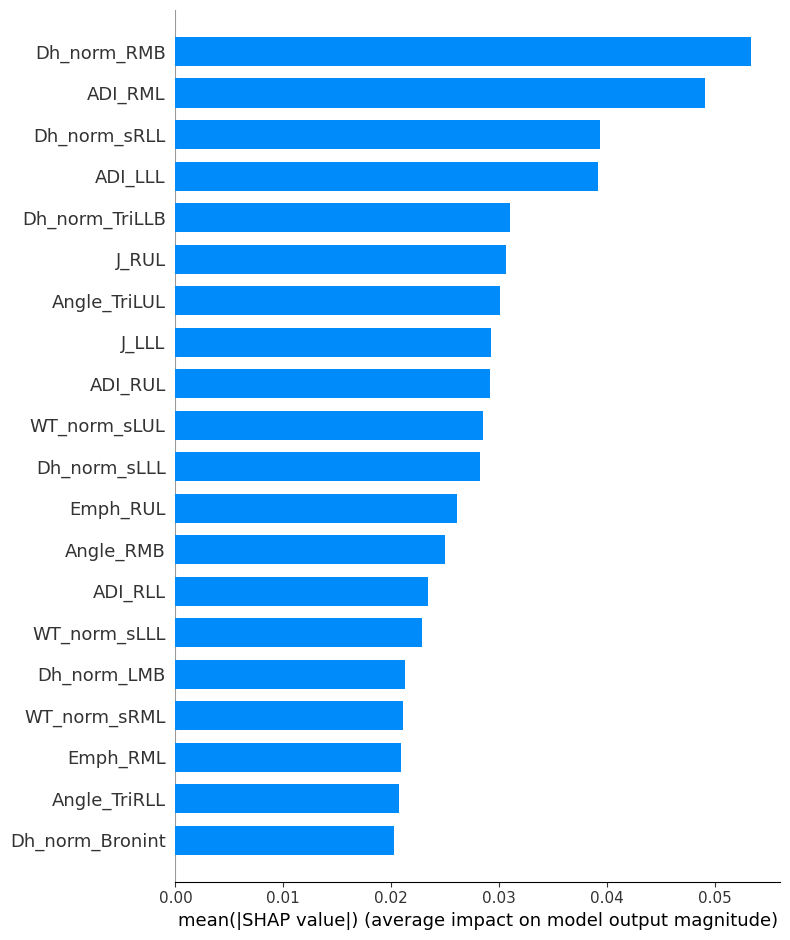

In [ ]:
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 100

shap.summary_plot(shap_values[0], 
                  test_data, 
                  feature_names = feat_names1,
                  plot_type = "bar",
                  show = True,
                  sort = True)

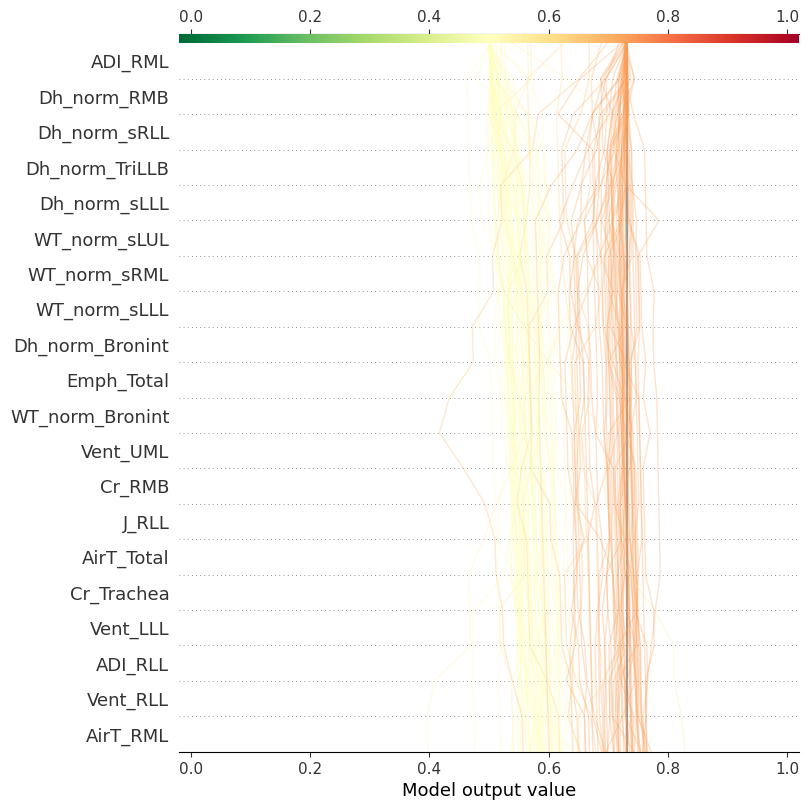

In [ ]:
shap.decision_plot(base_value = expected_value[0], 
                   shap_values = shap_values[0], 
                   feature_order='hclust',
                   feature_names = feat_names1,
                   features = test_data,
                   plot_color= cm.RdYlGn_r,
                   alpha = 0.3,
                   link='logit',
                  new_base_value = True)

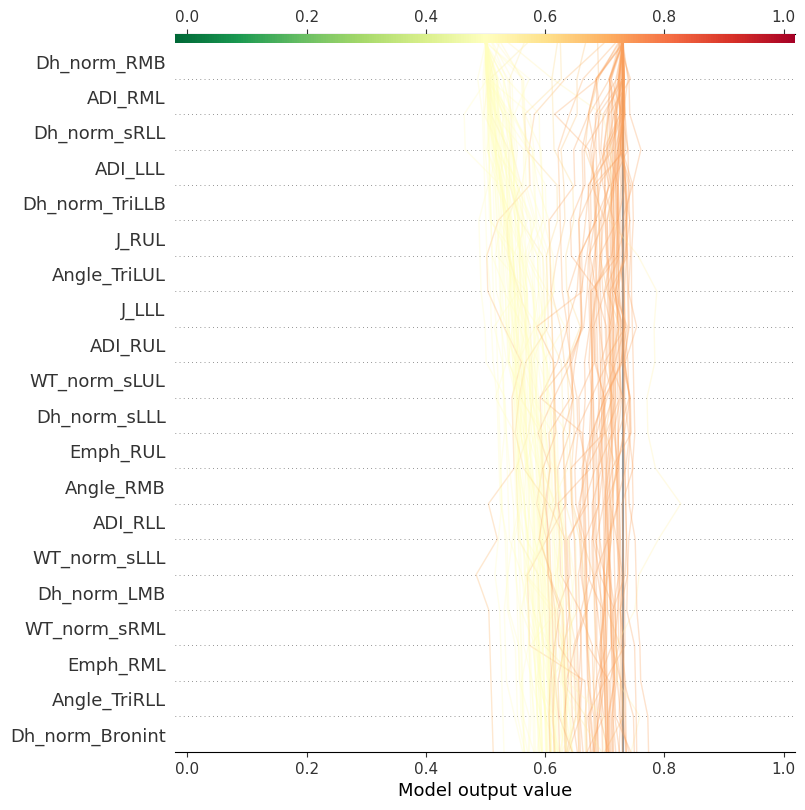

In [ ]:
shap.decision_plot(base_value = expected_value[0], 
                   shap_values = shap_values[0], 
                   feature_order='importance',
                   feature_names = feat_names1,
                   features = test_data,
                   plot_color= cm.RdYlGn_r,
                   alpha = 0.3,
                   link='logit',
                  new_base_value = True)

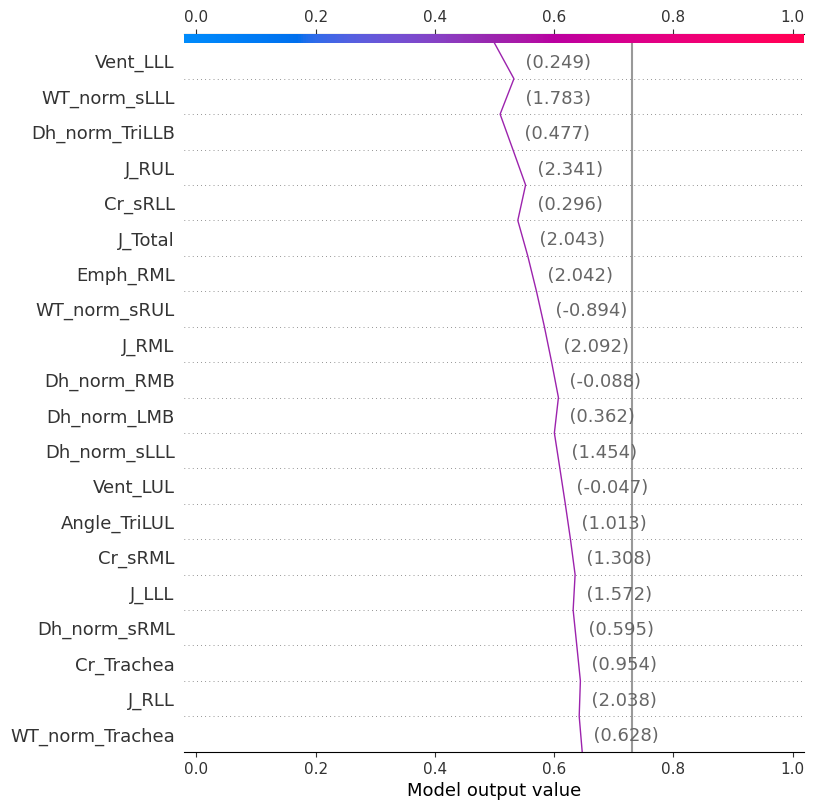

In [ ]:
#The decision plot makes it possible to observe the amplitude of each change
# X: predict results: probability from 0-1 for classification
case = 5

shap.decision_plot(base_value = expected_value[0], 
                   shap_values = shap_values[0][case], 
                   feature_order='importance',
                   feature_names = feat_names1,
                   features = test_data[case],
                   alpha = 1,
                   link='logit',
                  new_base_value = True)

In [ ]:
#The force plot is good to see where the “output value” fits in relation to the “base value”. 
# It also shows which features have a positive (red) or negative (blue) impact on the prediction and the magnitude of the impact.
case = 10

shap.force_plot(base_value = expected_value[0], 
                shap_values = shap_values[0][case],
                features =  test_data[case],
                feature_names = feat_names1,
                out_names = labs,
                link = 'logit',
                figsize = (10,15))

In [ ]:
case = 1

shap.force_plot(base_value = expected_value[0], 
                shap_values = shap_values[0][case],
                features =  test_data[case],
                feature_names = feat_names1,
                out_names = labs,
                link = 'logit',
                figsize = (10,15))

In [ ]:
shap.force_plot(base_value = expected_value[0], 
                shap_values = shap_values[0],
                features =  test_data,
                feature_names = feat_names1,
                link = 'logit',
                figsize = (10,15))

In [ ]:
# https://github.com/slundberg/shap
# https://www.youtube.com/watch?v=d6PsRiEKTb8
# https://www.youtube.com/watch?v=u7Om2joZWYs
# https://towardsdatascience.com/deep-learning-model-interpretation-using-shap-a21786e91d16
# https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
# https://www.lengockhanhi.com/post/shap-v%C3%A0-multiclass-classification?fbclid=IwAR14g2-lDKYAiHrmZu8jOsKCZr4i_DFnPYauT--p3C2Ty45l3_mSMKwvs5c
# https://www.lengockhanhi.com/post/shap-v%C3%A0-multiclass-classification?fbclid=IwAR14g2-lDKYAiHrmZu8jOsKCZr4i_DFnPYauT--p3C2Ty45l3_mSMKwvs5c
# https://github.com/kinokoberuji/Statistics-Python-Tutorials/blob/master/shap%20survival%20xgb.ipynb?fbclid=IwAR1QBpwMFkbYcLa8v3BJPRJNuZrs22EF2frqyYrEp1WT7ypqNOTnRWT37FY